In [1]:
import matplotlib.pyplot as plt
import pickle
import os
import numpy as np

# Calc FLOPS

In [2]:
from calc_pseudo import clean, basic_flops
B_TARGET_PANEL_WIDTH = 48

In [3]:
MAT_PATH = "./../../synth_mats/"
mat_paths = sum([[os.path.join(dir, file) for file in files] for dir, _, files in os.walk(MAT_PATH)], [])

In [4]:
mat_flops = {}

In [5]:
for mat_path in mat_paths:
    with open(mat_path) as f:
        test_mat = clean(np.loadtxt(f))
    FLOPS_PER_PANEL = basic_flops(test_mat, B_TARGET_PANEL_WIDTH)
    
    mat_flops[mat_path.split("./../../")[1]] = FLOPS_PER_PANEL

## Load Data

In [6]:
LOG_DIR = "./../../logs/reg_pack/synth/"

In [7]:
# 'a_cols'
# 'a_rows'
# 'a_unique'
# 'density'
# 'mat_file'
# 'speedup_avg'
# 'speedup_best'
# 'xsmm_local_avg'
# 'xsmm_local_best'
# 'xsmm_upstream_avg'
# 'xsmm_upstream_best'

with open(LOG_DIR+"run_1.dat", "rb") as f:
    run_1 = pickle.load(f)
with open(LOG_DIR+"run_2.dat", "rb") as f:
    run_2 = pickle.load(f)
with open(LOG_DIR+"run_3.dat", "rb") as f:
    run_3 = pickle.load(f)

with open(LOG_DIR+"dense_unique/run_1.dat", "rb") as f:
    dense_run_1 = pickle.load(f)
with open(LOG_DIR+"dense_unique/run_2.dat", "rb") as f:
    dense_run_2 = pickle.load(f)
with open(LOG_DIR+"dense_unique/run_3.dat", "rb") as f:
    dense_run_3 = pickle.load(f)


## Sort Data

In [8]:
def sort_values(x_term, run, t='best'):
    global mat_flops
    NUM_PANELS = 192000 / 48

    local_best = []
    ref_best = []
    local_best_x, local_best_y = [], []
    ref_best_x, ref_best_y = [], []

    for i, u in enumerate(run[x_term]):
        FLOPS_PER_PANEL = mat_flops[run['mat_file'][i]]

        time_per_panel_local = (run['xsmm_local_'+t][i]*1e-3)/NUM_PANELS
        time_per_panel_ref   = (run['xsmm_upstream_'+t][i]*1e-3)/NUM_PANELS
        
        local_best_x.append(u)
        local_best_y.append(FLOPS_PER_PANEL / time_per_panel_local)
        ref_best_x.append(u)
        ref_best_y.append(FLOPS_PER_PANEL / time_per_panel_ref)
    
    old_len = len(local_best_y)

    local_best_y = [x for _,x in sorted(zip(local_best_x,local_best_y))]
    local_best_x.sort()
    
    assert(old_len == len(local_best_y))

    ref_best_y = [x for _,x in sorted(zip(ref_best_x,ref_best_y))]
    ref_best_x.sort()

    return local_best_x, local_best_y, ref_best_x, ref_best_y

# Vary Rows

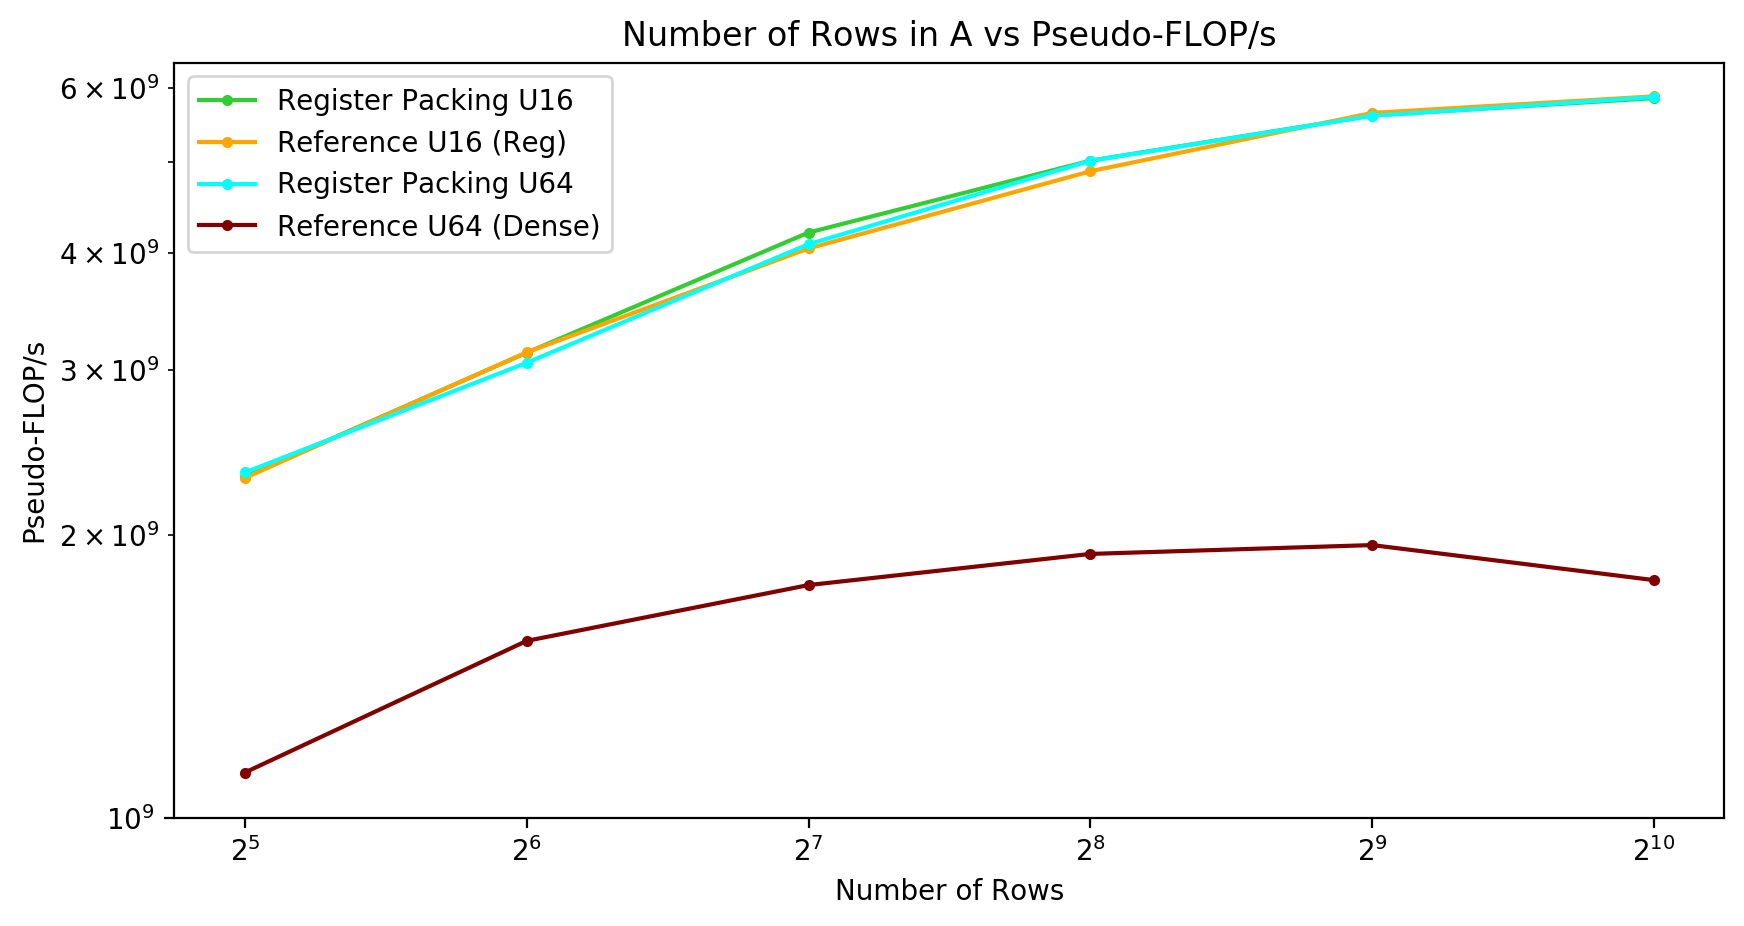

In [9]:
plt.figure(dpi=200, figsize=(10,5))

# Q 16
local_best_x1_16, local_best_y1_16, ref_best_x1_16, ref_best_y1_16 = \
    sort_values("a_rows", run_1["vary_row/q_16"], 'best')
local_best_x2_16, local_best_y2_16, ref_best_x2_16, ref_best_y2_16 = \
    sort_values("a_rows", run_2["vary_row/q_16"], 'best')
local_best_x3_16, local_best_y3_16, ref_best_x3_16, ref_best_y3_16 = \
    sort_values("a_rows", run_3["vary_row/q_16"], 'best')
local_best_y_avg_16 = [sum(elem)/len(elem) for elem in zip(local_best_y1_16, local_best_y2_16, local_best_y3_16)]
ref_best_y_avg_16 = [sum(elem)/len(elem) for elem in zip(ref_best_y1_16, ref_best_y2_16, ref_best_y3_16)]

# Q 64
local_best_x1_64, local_best_y1_64, ref_best_x1_64, ref_best_y1_64 = \
    sort_values("a_rows", run_1["vary_row/q_64"], 'best')
local_best_x2_64, local_best_y2_64, ref_best_x2_64, ref_best_y2_64 = \
    sort_values("a_rows", run_2["vary_row/q_64"], 'best')
local_best_x3_64, local_best_y3_64, ref_best_x3_64, ref_best_y3_64 = \
    sort_values("a_rows", run_3["vary_row/q_64"], 'best')
local_best_y_avg_64 = [sum(elem)/len(elem) for elem in zip(local_best_y1_64, local_best_y2_64, local_best_y3_64)]
ref_best_y_avg_64 = [sum(elem)/len(elem) for elem in zip(ref_best_y1_64, ref_best_y2_64, ref_best_y3_64)]


plt.plot(local_best_x1_16, local_best_y_avg_16, label="Register Packing U16", color="limegreen", marker=".")
plt.plot(ref_best_x1_16, ref_best_y_avg_16, label="Reference U16 (Reg)", color="orange", marker=".")

plt.plot(local_best_x1_64, local_best_y_avg_64, label="Register Packing U64", color="cyan", marker=".")
plt.plot(ref_best_x1_64, ref_best_y_avg_64, label="Reference U64 (Dense)", color="maroon", marker=".")

plt.xlabel("Number of Rows")
plt.ylabel("Pseudo-FLOP/s")
plt.yscale("log", basey=10)
plt.xscale("log", basex=2)
plt.ylim(bottom=1e9)
plt.title("Number of Rows in A vs Pseudo-FLOP/s")
plt.legend()
plt.savefig("./../../plots/reg_packing_comp/synth/vary_row.pdf")
plt.show()

## Vary Cols

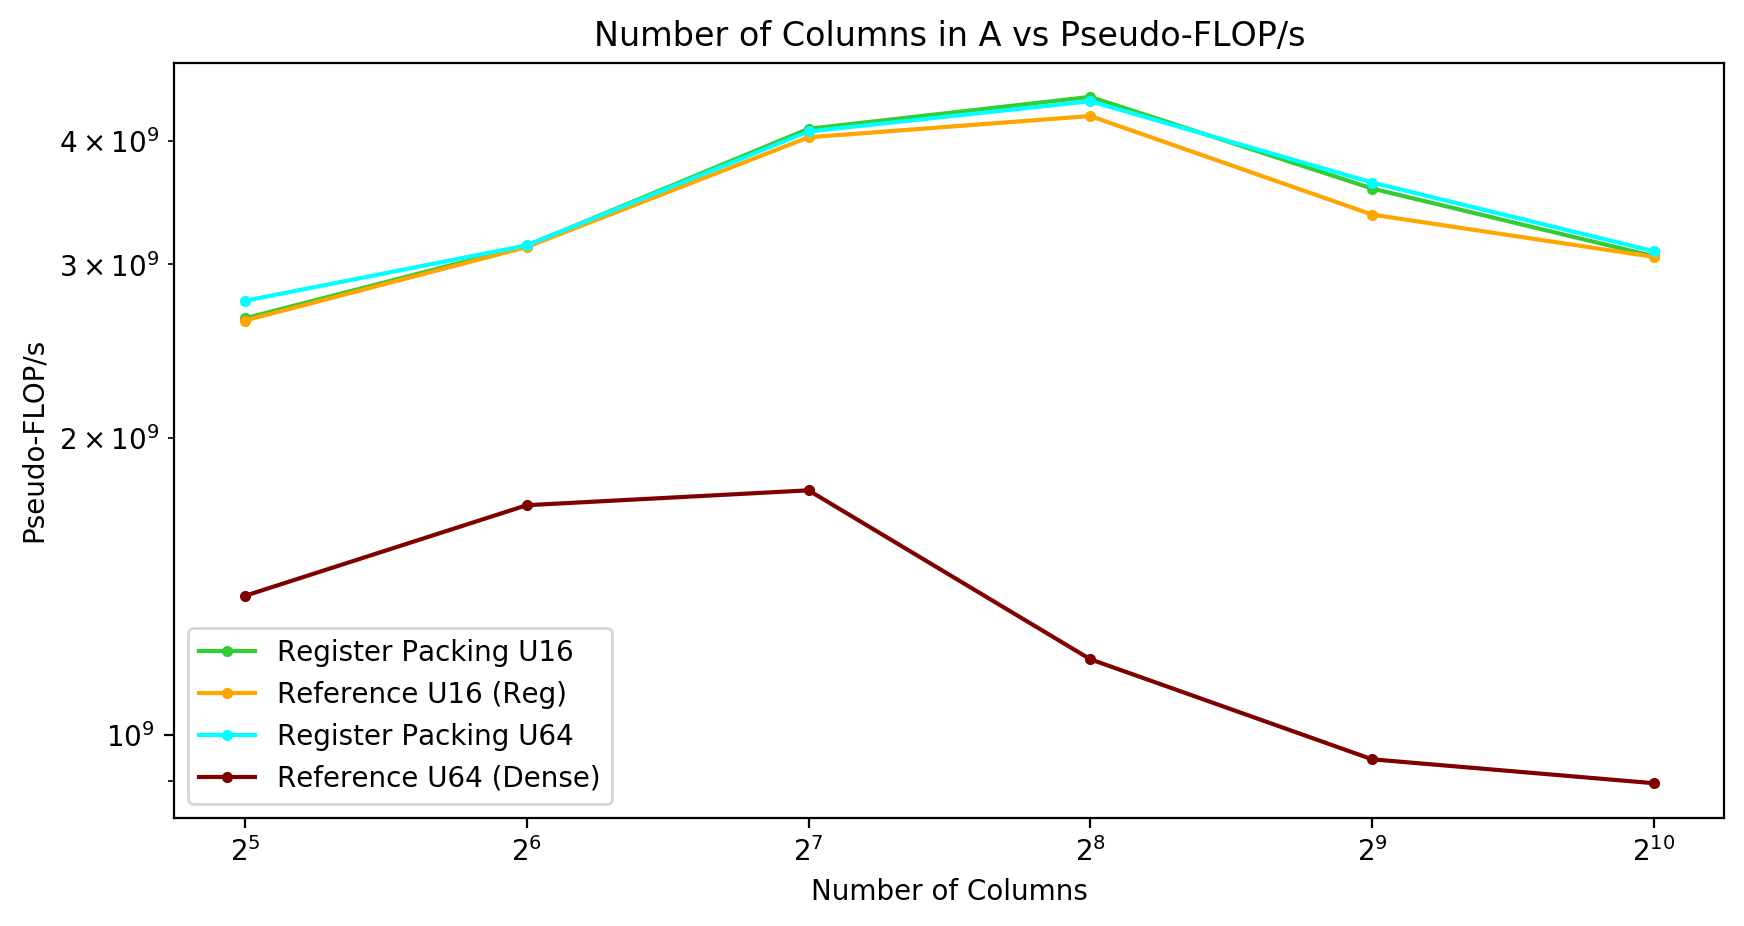

In [10]:
plt.figure(dpi=200, figsize=(10,5))

# Q 16
local_best_x1_16, local_best_y1_16, ref_best_x1_16, ref_best_y1_16 = \
    sort_values("a_cols", run_1["vary_col/q_16"], 'best')
local_best_x2_16, local_best_y2_16, ref_best_x2_16, ref_best_y2_16 = \
    sort_values("a_cols", run_2["vary_col/q_16"], 'best')
local_best_x3_16, local_best_y3_16, ref_best_x3_16, ref_best_y3_16 = \
    sort_values("a_cols", run_3["vary_col/q_16"], 'best')
local_best_y_avg_16 = [sum(elem)/len(elem) for elem in zip(local_best_y1_16, local_best_y2_16, local_best_y3_16)]
ref_best_y_avg_16 = [sum(elem)/len(elem) for elem in zip(ref_best_y1_16, ref_best_y2_16, ref_best_y3_16)]

# Q 64
local_best_x1_64, local_best_y1_64, ref_best_x1_64, ref_best_y1_64 = \
    sort_values("a_cols", run_1["vary_col/q_64"], 'best')
local_best_x2_64, local_best_y2_64, ref_best_x2_64, ref_best_y2_64 = \
    sort_values("a_cols", run_2["vary_col/q_64"], 'best')
local_best_x3_64, local_best_y3_64, ref_best_x3_64, ref_best_y3_64 = \
    sort_values("a_cols", run_3["vary_col/q_64"], 'best')
local_best_y_avg_64 = [sum(elem)/len(elem) for elem in zip(local_best_y1_64, local_best_y2_64, local_best_y3_64)]
ref_best_y_avg_64 = [sum(elem)/len(elem) for elem in zip(ref_best_y1_64, ref_best_y2_64, ref_best_y3_64)]


plt.plot(local_best_x1_16, local_best_y_avg_16, label="Register Packing U16", color="limegreen", marker=".")
plt.plot(ref_best_x1_16, ref_best_y_avg_16, label="Reference U16 (Reg)", color="orange", marker=".")

plt.plot(local_best_x1_64, local_best_y_avg_64, label="Register Packing U64", color="cyan", marker=".")
plt.plot(ref_best_x1_64, ref_best_y_avg_64, label="Reference U64 (Dense)", color="maroon", marker=".")

plt.xlabel("Number of Columns")
plt.ylabel("Pseudo-FLOP/s")
plt.yscale("log", basey=10)
plt.xscale("log", basex=2)
plt.title("Number of Columns in A vs Pseudo-FLOP/s")
plt.legend()
plt.savefig("./../../plots/reg_packing_comp/synth/vary_col.pdf")
plt.show()

##  Vary Density

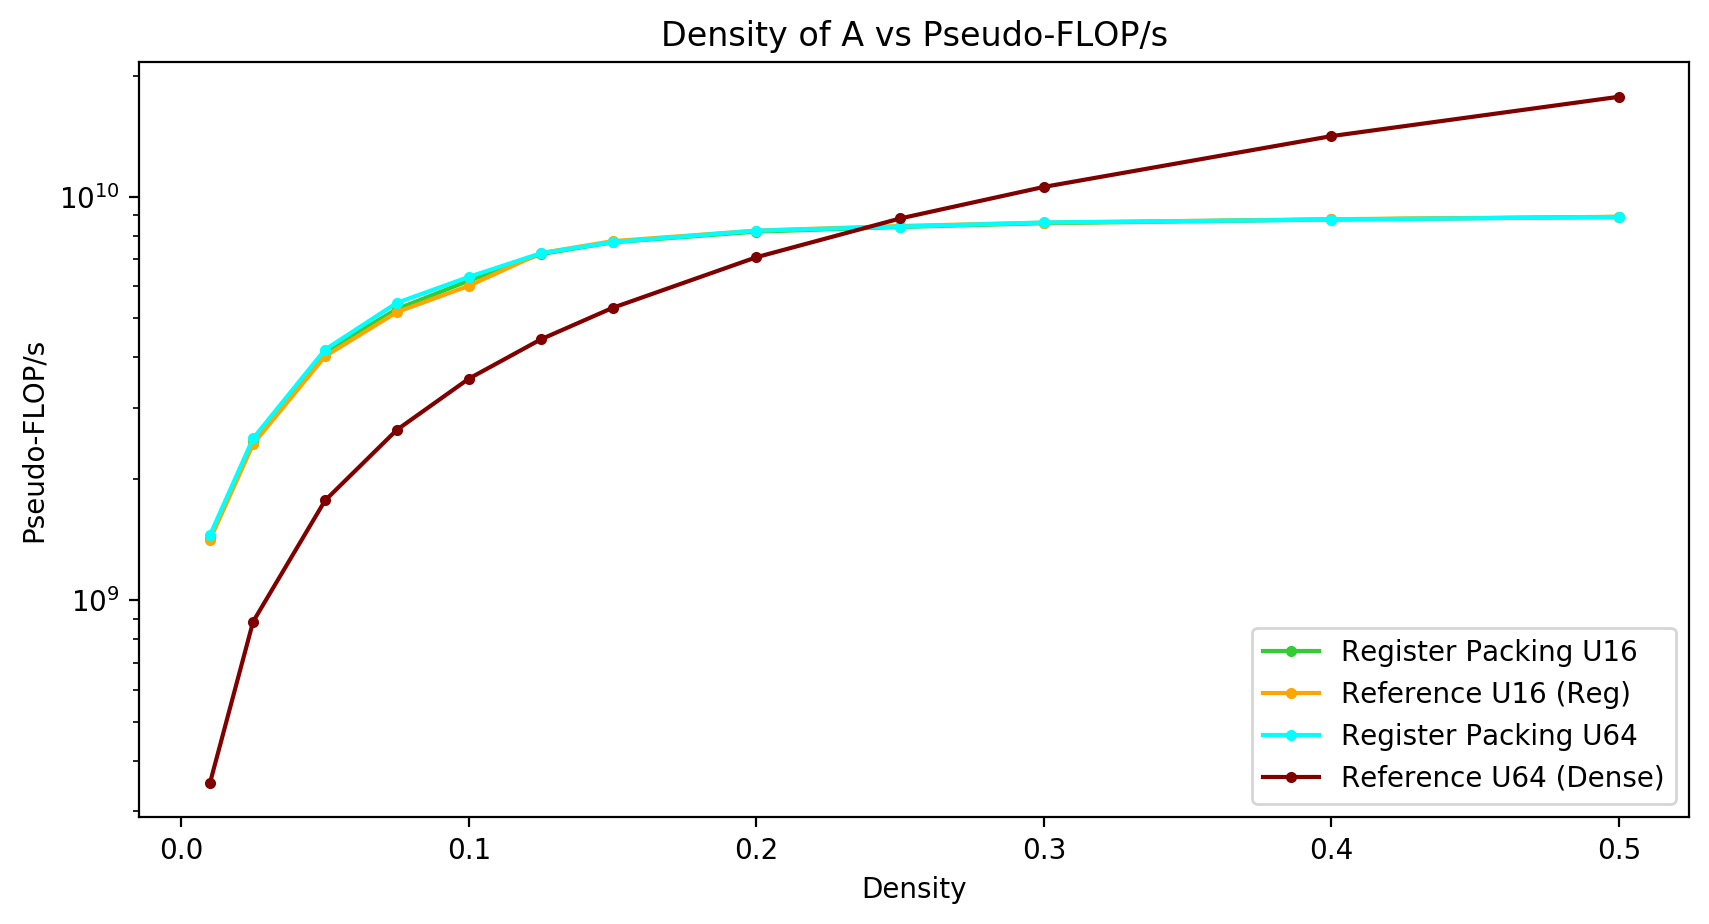

In [11]:
plt.figure(dpi=200, figsize=(10,5))

# Q 16
local_best_x1_16, local_best_y1_16, ref_best_x1_16, ref_best_y1_16 = \
    sort_values("density", run_1["vary_density/q_16"], 'best')
local_best_x2_16, local_best_y2_16, ref_best_x2_16, ref_best_y2_16 = \
    sort_values("density", run_2["vary_density/q_16"], 'best')
local_best_x3_16, local_best_y3_16, ref_best_x3_16, ref_best_y3_16 = \
    sort_values("density", run_3["vary_density/q_16"], 'best')
local_best_y_avg_16 = [sum(elem)/len(elem) for elem in zip(local_best_y1_16, local_best_y2_16, local_best_y3_16)]
ref_best_y_avg_16 = [sum(elem)/len(elem) for elem in zip(ref_best_y1_16, ref_best_y2_16, ref_best_y3_16)]

# Q 64
local_best_x1_64, local_best_y1_64, ref_best_x1_64, ref_best_y1_64 = \
    sort_values("density", run_1["vary_density/q_64"], 'best')
local_best_x2_64, local_best_y2_64, ref_best_x2_64, ref_best_y2_64 = \
    sort_values("density", run_2["vary_density/q_64"], 'best')
local_best_x3_64, local_best_y3_64, ref_best_x3_64, ref_best_y3_64 = \
    sort_values("density", run_3["vary_density/q_64"], 'best')
local_best_y_avg_64 = [sum(elem)/len(elem) for elem in zip(local_best_y1_64, local_best_y2_64, local_best_y3_64)]
ref_best_y_avg_64 = [sum(elem)/len(elem) for elem in zip(ref_best_y1_64, ref_best_y2_64, ref_best_y3_64)]


plt.plot(local_best_x1_16, local_best_y_avg_16, label="Register Packing U16", color="limegreen", marker=".")
plt.plot(ref_best_x1_16, ref_best_y_avg_16, label="Reference U16 (Reg)", color="orange", marker=".")

plt.plot(local_best_x1_64, local_best_y_avg_64, label="Register Packing U64", color="cyan", marker=".")
plt.plot(ref_best_x1_64, ref_best_y_avg_64, label="Reference U64 (Dense)", color="maroon", marker=".")

plt.xlabel("Density")
plt.ylabel("Pseudo-FLOP/s")
plt.yscale("log", basey=10)
plt.title("Density of A vs Pseudo-FLOP/s")
plt.legend()
plt.savefig("./../../plots/reg_packing_comp/synth/vary_density.pdf")
plt.show()

## Vary Num Unique

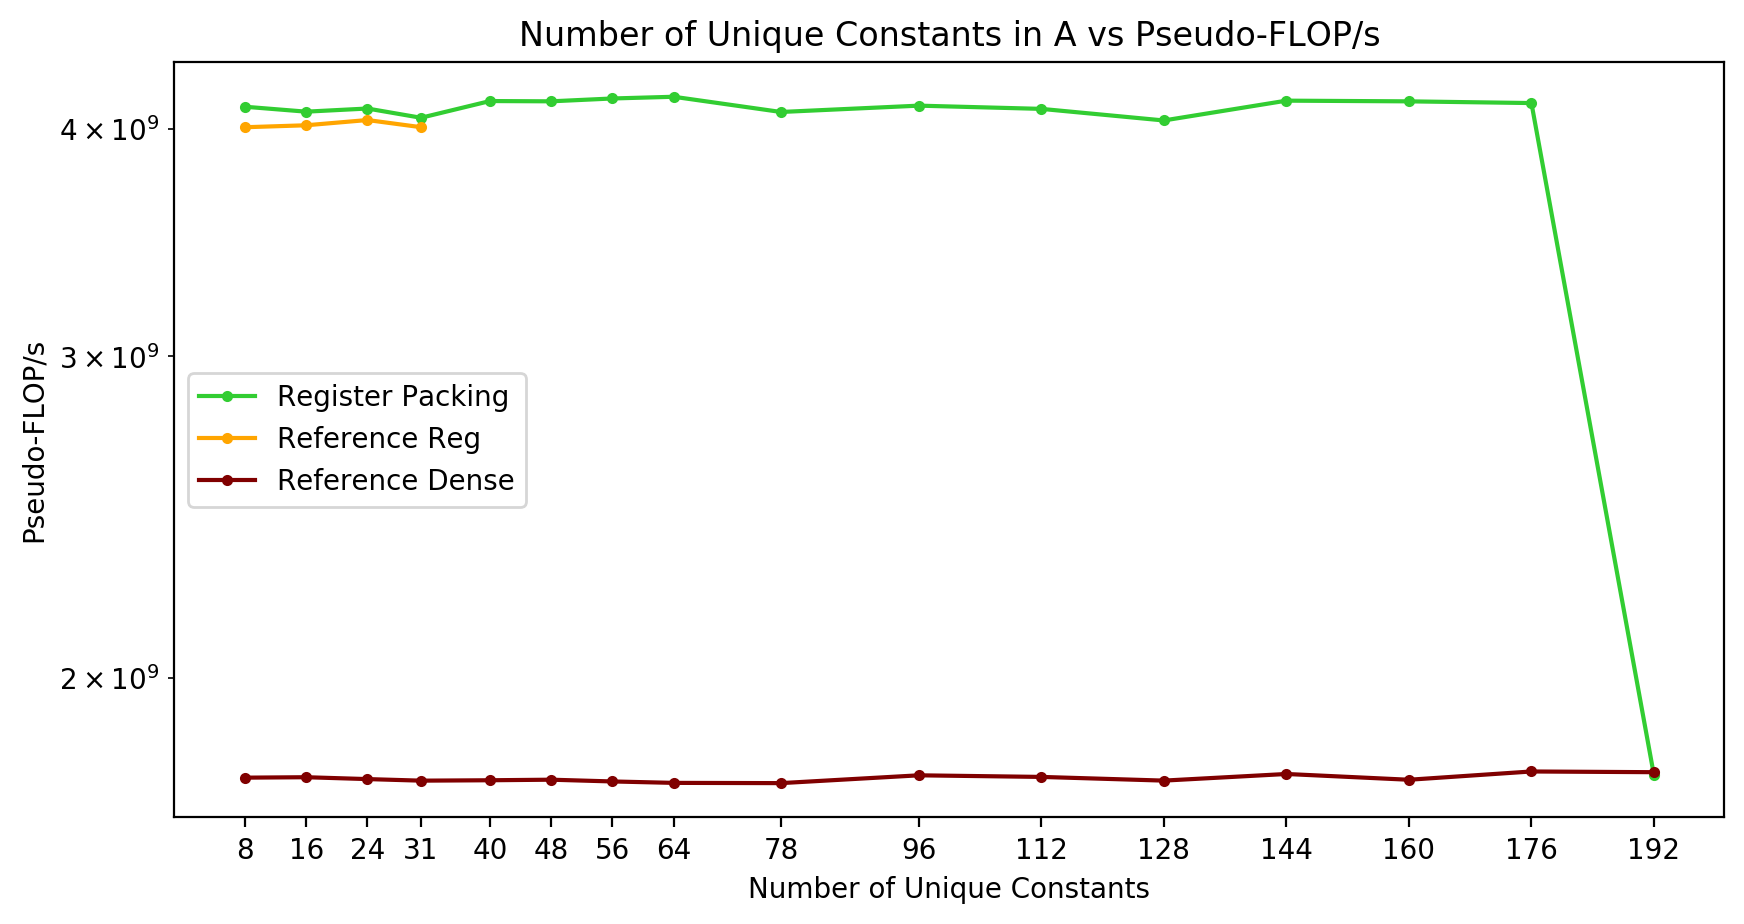

In [12]:
plt.figure(dpi=200, figsize=(10,5))

local_best_x1, local_best_y1, ref_best_x1, ref_best_y1 = \
    sort_values("a_unique", run_1["vary_unique"], 'best')
local_best_x2, local_best_y2, ref_best_x2, ref_best_y2 = \
    sort_values("a_unique", run_2["vary_unique"], 'best')
local_best_x3, local_best_y3, ref_best_x3, ref_best_y3 = \
    sort_values("a_unique", run_3["vary_unique"], 'best')
local_best_y_avg = [sum(elem)/len(elem) for elem in zip(local_best_y1, local_best_y2, local_best_y3)]
ref_best_y_avg = [sum(elem)/len(elem) for elem in zip(ref_best_y1, ref_best_y2, ref_best_y3)]

_, _, dense_best_x1, dense_best_y1 = \
    sort_values("a_unique", dense_run_1["vary_unique"], 'best')
_, _, dense_best_x2, dense_best_y2 = \
    sort_values("a_unique", dense_run_1["vary_unique"], 'best')
_, _, dense_best_x3, dense_best_y3 = \
    sort_values("a_unique", dense_run_1["vary_unique"], 'best')
dense_best_y_avg = [sum(elem)/len(elem) for elem in zip(dense_best_y1, dense_best_y2, dense_best_y3)]

plt.plot(local_best_x1, local_best_y_avg, label="Register Packing", color="limegreen", marker=".")
plt.plot(ref_best_x1[:4], ref_best_y_avg[:4], label="Reference Reg", color="orange", marker=".")
plt.plot(dense_best_x1, dense_best_y_avg, label="Reference Dense", color="maroon", marker=".")

plt.xlabel("Number of Unique Constants")
plt.ylabel("Pseudo-FLOP/s")
plt.yscale("log", basey=10)
plt.xticks(local_best_x1)
plt.title("Number of Unique Constants in A vs Pseudo-FLOP/s")
plt.legend()
plt.savefig("./../../plots/reg_packing_comp/synth/vary_unique.pdf")
plt.show()